In [9]:
import utils.file_utils as fu
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sys
import yaml

import numpy as np
import seaborn as sns

In [10]:
DUAL_PATH="../../data/dual_SOLGAS.csv"

In [11]:
df=pd.read_csv(open(DUAL_PATH))
df.head(15)

,Unnamed: 0,disc,label,meta_G_GAS,meta_G_SOL,metric_Unnamed: 0,metric_energy,metric_maximize_distance,metric_maxtime,metric_minimize_activation,metric_minimize_passive_torques,metric_minimize_periodic_gait,metric_velocity
0,0,False,1,1.205,4.876,0,0.646709,9.490481,1701.0,355.396292,184921.097414,129.082769,1.120441
1,1,False,2,1.205,2.412,0,0.646709,8.820810,1449.0,394.695169,59176.762498,217.431847,1.222544
2,2,False,3,11.118,3.412,0,0.646709,22.715314,3679.0,192.309874,15628.259692,119.513675,1.236848
3,3,False,4,0.974,6.340,0,0.646709,9.120476,1675.0,357.523519,193140.471922,993.594793,1.093389
4,4,False,5,1.051,10.000,0,0.646709,6.938505,1959.0,282.507985,565383.035710,753.661590,0.712153
5,5,False,6,3.972,6.340,0,0.646709,16.580394,3145.0,224.312774,70485.962829,20.613555,1.056730
6,6,False,7,12.309,8.536,0,0.646709,9.465298,2519.0,276.995691,167200.375107,203.956460,0.754270
7,7,False,8,1.128,0.268,0,0.646709,11.733934,2361.0,217.079862,22897.063184,155.759665,0.997009
8,8,False,9,3.972,0.000,0,0.646709,9.928034,3125.0,198.788552,14327.903915,44.671467,0.637810
9,9,False,10,1.436,2.144,0,0.646709,23.336554,3395.0,171.346259,22650.184553,56.608460,1.377146


In [20]:
 cmap=sns.choose_cubehelix_palette(as_cmap=True)

interactive(children=(IntSlider(value=9, description='n_colors', max=16, min=2), FloatSlider(value=0.0, descri…

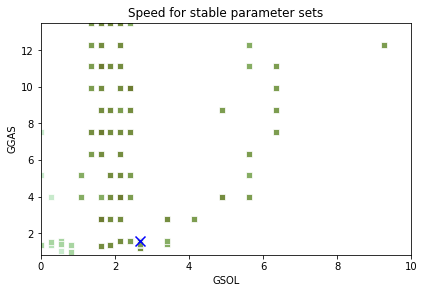

In [45]:
meta_1="meta_G_SOL"
meta_2="meta_G_GAS"
met="metric_velocity"
short_met="Velocity"
pd.options.mode.chained_assignment = None  # default='warn'
df["time"]=df.metric_maxtime/200.0
cmap = sns.cubehelix_palette(dark=0.4, light=.85, gamma=0.9,rot=.3,start=1.2,\
                             n_colors=2,hue=1.,as_cmap=True,reverse=False)
g=df[df.disc]
s=g[met].round(1)
#st=s.values.array2string()
np.set_printoptions(2)
g["Velocity"]=s
r=sns.scatterplot(x=meta_1,y=meta_2,hue=short_met,data=g,palette=cmap,legend=False,**{'marker':'s'})
#plt.colorbar()
#new_title = short_met
#leg.set_title(new_title)
new_labels = ['0.6', '0.9','1.2','1.5','ref']

#for t, l in zip(leg.texts, new_labels): t.set_text(l)

refx=2.6824131059368534
refy=1.5891605194328091155

plt.scatter(refx, refy, marker='x', s=100,color="b",label="ref")

#g=df[df['metric_maxtime']>=4000]
#
#sns.kdeplot(g[meta_1],g[meta_2],color='b',shade=True,shade_lowest=False,alpha=0.3)
plt.xlim((df[meta_1].min(),df[meta_1].max()))
plt.ylim((df[meta_2].min(),df[meta_2].max()))
#plt.legend(new_labels)
#plt.legend()

plt.xlabel("GSOL")
plt.ylabel("GGAS")
plt.tight_layout()
plt.title("Speed for stable parameter sets")
plt.savefig(short_met+"SOLGAS_nl.png",transparent=True,dpi=300)

In [19]:
ax=r.axes

In [ ]:
ax.set_label()

(0.55, 3.2)

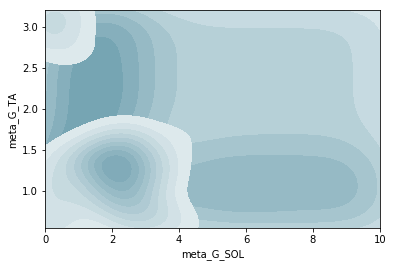

In [119]:
y=df[df['metric_maxtime']<4000]
sns.set_palette(p)
sns.kdeplot(y[meta_1],y[meta_2]),shade=True,shade_lowest=False)
g=df[df['metric_maxtime']>=4000]
#sns.set_palette(p[0:3])
sns.kdeplot(g[meta_1],g[meta_2],shade=True,shade_lowest=False)
plt.xlim((df[meta_1].min(),df[meta_1].max()))
plt.ylim((df[meta_2].min(),df[meta_2].max()))

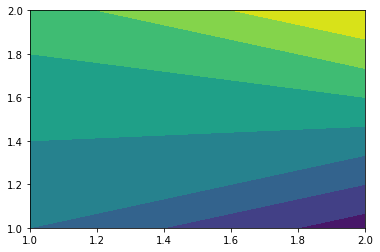

In [81]:
plt.contourf([1,2],[1,2],[[2,1],[3,4]])